# 전체 개발 과정

# 수식 계산기

In [16]:
# 숫자 확인함수
def check_float(n):
    try:
        float(n)
        return True
    except:
        return False
        
# 토크나이저
def tokenizer(s):
    tokens = []
    n = ""
    for i in range(len(s)):
        t = s[i]

        # 숫자, 소수점, 음수 부호
        if t.isdigit() or t == '.' or (t == '-' and (i == 0 or s[i - 1] in '+-*/(^')):
            n += t
        else:
            if n:
                tokens.append(n)
                n = ""
            tokens.append(t)

    if n:
        tokens.append(n)


    return tokens

#shunting yard알고리즘
def shunting_yard(tokens):
    # 연산자의 우선순위
    U = {'+':1, '-':1, '*':2, '/':2, '^':3}
    R = {'^'}
    result = []
    stack = []
    for token in tokens:
        #토큰이 숫자인경우
        if check_float(token):
            result.append(token)
        
        # 연산자인경우
        elif token in U:
            while stack and (stack[-1] in U ) and (U[stack[-1]] > U[token] or (U[stack[-1]] == U[token]) and token not in R):
                result.append(stack.pop())
            stack.append(token)

        # 괄호일경우-(
        elif token=='(':
            stack.append(token)

        # 괄호일경우-)
        elif token==')':
            while stack and stack[-1]!='(':
                result.append(stack.pop())
            stack.pop()

    # 남은 스택 결과에 추가
    while stack:
        result.append(stack.pop())

    return result

#후위계산법
def calc(spt):
    if len(spt)==1:
        return float(spt[0])
    
    stack = []
    for token in spt:
        if check_float(token):
            stack.append(token)
        else:
            try:
                v2 = float(stack.pop())
                v1 = float(stack.pop())

                # 연산
                if token=='+':
                    r = v1+v2
                elif token=='-':
                    r = v1-v2
                elif token=='*':
                    r = v1*v2
                elif token=='/':
                    r = v1/v2
                elif token=='^':
                    r = v1**v2
                
                if abs(r) > 1_000_000_000_000:
                    return "시스템 과부하로 인해 값은 최대로 1조 미만까지 입니다."

                stack.append(r)
            except IndexError:
                return "계산 오류: 수식을 재점검 해주세요."
            except ZeroDivisionError:
                return "계산 오류: 0으로 나눌수 없습니다."
            except Exception:
                return "알수없는 오류발생."

    # 결과 출력
    if stack:
        return stack[0]
    else:
        return f'입력된값이 없습니다. 현재스택: {stack}'

# 수식계산
def total_calc(sentence):
    # 토큰 분류
    spt = tokenizer(sentence)
    
    # 우선순위 만들기
    trans_spt = shunting_yard(spt)

    # 계산하기
    r = calc(trans_spt)

    # 결과 출력
    return r

words = input().replace(' ', '')
total_calc(words)

'계산 오류: 수식을 재점검 해주세요.'

In [16]:
import requests
from bs4 import BeautifulSoup

def get_myr_to_krw():
    url = "https://www.x-rates.com/calculator/?from=MYR&to=KRW&amount=1"
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    value = soup.select_one("#content > div:nth-child(1) > div > div:nth-child(1) > div > div > span.ccOutputRslt")

    if value:
        return value.text.strip()
    else:
        return "❌ 환율 정보를 찾을 수 없습니다."

float(get_myr_to_krw().split()[0])


322.125194

C:\Users\lsy45\AppData\Local\Temp\ipykernel_2992\4234629050.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserW

📈 지난 90일 평균환율: 325.9569
📌 최신환율 (오늘): 321.9500
✅ 현재 환율이 평균보다 1% 이상 낮습니다. ‘지금 사기 좋은 시점’입니다.


C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lsy45\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


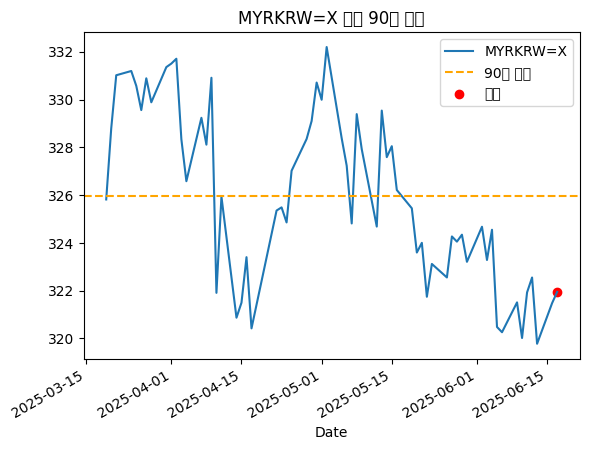

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# 1. 환율 데이터 가져오기 (예: USD/MYR, 'MYRUSD=X'는 MYR → USD, 필요에 따라 수정)
ticker = 'MYRKRW=X'  # 예시로 수정 필요 (yfinance에 있는 MYR ticker 찾아야 함)
end = datetime.today()
start = end - timedelta(days=90)

df = yf.download(ticker, start=start, end=end)

if df.empty:
    raise ValueError("환율 데이터를 불러오지 못했어요. ticker를 확인해 주세요.")

if isinstance(df['Close'], pd.DataFrame):
    close_series = df['Close'].iloc[:, 0]
else:
    close_series = df['Close']

latest = close_series.iloc[-1]
mean_2m = close_series.mean()


print(f"📈 지난 90일 평균환율: {mean_2m:.4f}")
print(f"📌 최신환율 (오늘): {latest:.4f}")

if latest < mean_2m * 0.97:
    print("✅ 현재 환율이 평균보다 **3% 이상 낮습니다. 적극적으로 환전하기 좋은 시점입니다.**")
elif latest < mean_2m * 0.99:
    print("🟢 현재 환율이 평균보다 **1~3% 낮습니다. 환전을 고려해볼 만한 시점입니다.**")
elif latest > mean_2m * 1.03:
    print("🔴 현재 환율이 평균보다 **3% 이상 높습니다. 지금 환전은 피하는 것이 좋습니다.**")
elif latest > mean_2m * 1.01:
    print("🟠 현재 환율이 평균보다 **1~3% 높습니다. 가격이 다소 높으니 신중히 판단하세요.**")
else:
    print("🟡 현재 환율이 평균 수준입니다. 급하지 않다면 조금 더 지켜보는 것도 좋습니다.")


# 4. 시각화를 원하면:
import matplotlib.pyplot as plt
df['Close'].plot(title=f"{ticker} 최근 90일 환율")
plt.axhline(mean_2m, color='orange', linestyle='--', label='90일 평균')
plt.scatter(df.index[-1], latest, color='red', label='현재')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import streamlit as st

myr_usd = yf.download("MYRKRW=X", period="3mo", interval="1d", progress=False)

df = myr_usd.iloc[:, :1].reset_index()

if df.empty:
    st.errorValueError("환율 데이터를 불러오지 못했어요.")
else:
    st.title("환전 타이밍 추천")
    mean_3m = df['Close'].mean()
    date, last_v = df.iloc[-1, :].to_list()

    st.subheader(f"📈 지난 3달간 평균환율: {mean_3m:.4f}")
    st.subheader(f"📌 최신환율 (오늘): {latest:.4f}")
    st.subheader('')

    if latest < mean_3m * 0.97:
        st.markdown("✅ 현재 환율이 평균보다 **3% 이상 낮습니다. 적극적으로 환전하기 좋은 시점입니다.**")
    elif latest < mean_3m * 0.99:
        st.markdown("🟢 현재 환율이 평균보다 **1~3% 낮습니다. 환전을 고려해볼 만한 시점입니다.**")
    elif latest > mean_2m * 1.03:
        st.markdown("🔴 현재 환율이 평균보다 **3% 이상 높습니다. 지금 환전은 피하는 것이 좋습니다.**")
    elif latest > mean_2m * 1.01:
        st.markdown("🟠 현재 환율이 평균보다 **1~3% 높습니다. 가격이 다소 높으니 신중히 판단하세요.**")
    else:
        st.markdown("🟡 현재 환율이 평균 수준입니다. 급하지 않다면 조금 더 지켜보는 것도 좋습니다.")

    

date, last_v

C:\Users\lsy45\AppData\Local\Temp\ipykernel_2992\3739287387.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  myr_usd = yf.download("MYRKRW=X", period="3mo", interval="1d", progress=False)


(Timestamp('2025-06-17 00:00:00'), 321.95001220703125)

In [45]:
df = myr_usd.reset_index()
df["Date"]

0    2025-03-17
1    2025-03-18
2    2025-03-19
3    2025-03-20
4    2025-03-21
        ...    
60   2025-06-11
61   2025-06-12
62   2025-06-13
63   2025-06-16
64   2025-06-17
Name: Date, Length: 65, dtype: datetime64[ns]

In [56]:
pd.DataFrame({"CP출발시간":['7:25', '7:55', '8:25', '8:55', '9:25', '9:55', "11:30",  '12:10', '12:50', '13:20', '13:50', '14:20', '14:50', '16:30', '17:10', '17:50', '18:30'],
              "T02도착시간":['7:40', '8:10', '8:40', '9:10', '9:40', '10:10', '11:50', '12:30', '13:05','13:35', '14:05', '14:35', '15:05', '16:50', '17:30', '18:10', '18:50']})

,CP출발시간,T02도착시간
0,7:25,7:40
1,7:55,8:10
2,8:25,8:40
3,8:55,9:10
4,9:25,9:40
5,9:55,10:10
6,11:30,11:50
7,12:10,12:30
8,12:50,13:05
9,13:20,13:35


In [53]:
a = []
for i in range(7, 11):
    for j in [10, 40]:
        a.append(f"{i}:{j}")

a

['7:10', '7:40', '8:10', '8:40', '9:10', '9:40', '10:10', '10:40']